In [14]:
# controlnet + txt2img
# enable `Allow other script to control this extension` in settings

import requests
import cv2
from base64 import b64encode

def readImage(path):
    img = cv2.imread(path)
    retval, buffer = cv2.imencode('.jpg', img)
    b64img = b64encode(buffer).decode("utf-8")
    return b64img

b64img = readImage("/root/workspace/nahida/0e17302b9bfa15402f783c29c0d1d34f.jpg")

class controlnetRequest():
    def __init__(self, prompt):
        self.url = "http://localhost:7860/controlnet/txt2img"
        self.body = {
            "prompt": prompt,
            "negative_prompt": "",
            "seed": -1,
            "subseed": -1,
            "subseed_strength": 0,
            "batch_size": 1,
            "n_iter": 1,
            "steps": 15,
            "cfg_scale": 7,
            "width": 512,
            "height": 768,
            "restore_faces": True,
            "eta": 0,
            "sampler_index": "Euler a",
            "controlnet_input_image": [b64img],
            "controlnet_module": 'canny',
            "controlnet_model": 'control_canny-fp16 [e3fe7712]',
            "controlnet_guidance": 1.0,
        }

    def sendRequest(self):
        r = requests.post(self.url, json=self.body)
        return r.json()

js = controlnetRequest("walter white").sendRequest()

<Figure size 640x480 with 0 Axes>

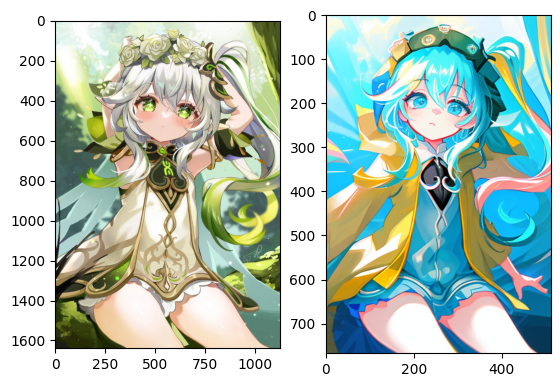

In [15]:
import io, base64
import matplotlib.pyplot as plt
from PIL import Image

pil_img = Image.open('/root/workspace/nahida/0e17302b9bfa15402f783c29c0d1d34f.jpg')
image = Image.open(io.BytesIO(base64.b64decode(js["images"][0])))

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(pil_img)   
axarr[1].imshow(image)  